# Exploratory Data Analysis

In [54]:
import pandas as pd

data = pd.read_csv("clean_data.csv", encoding = "Windows-1252")
old_data = pd.read_csv("justice.csv")

# Adding the year data from the old dataset to the dataframe
years = []
for case_name in data["case_name"]:
    year_data = old_data.loc[old_data["name"] == case_name, "term"]
    years.append(year_data.to_list()[0])

data["year"] = years

data.head()

,case_name,docket_num,first_party,second_party,facts,first_party_won,issue_area,ideologies,avg_ideology,year
0,Roe v. Wade,70-18,Jane Roe,Henry Wade,"In 1970, Jane Roe (a fictional name used in co...",True,Unknown,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
1,Stanley v. Illinois,70-5014,"Peter Stanley, Sr.",Illinois,Joan Stanley had three children with Peter Sta...,True,Civil Rights,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
2,Giglio v. United States,70-29,John Giglio,United States,John Giglio was convicted of passing forged mo...,True,Due Process,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",0.016778,1971
3,Reed v. Reed,70-4,Sally Reed,Cecil Reed,"The Idaho Probate Code specified that ""males m...",True,Civil Rights,"[-7.602, 0.109, -1.072, -1.174, 0.664, 2.439, ...",-0.703571,1971
4,Miller v. California,70-73,Marvin Miller,California,"Miller, after conducting a mass mailing campai...",True,First Amendment,"[2.439, -7.602, -1.174, 0.109, 0.664, -1.072, ...",0.016778,1971


### Change in Average Ideologies Overtime

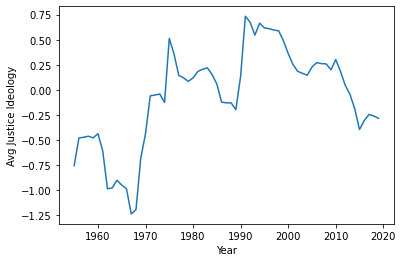

In [77]:
import matplotlib.pylab as plt

def term_str_to_int(x):
    if x == "1940-1955":
        return 1955
    else:
        return int(x)

def avg(x):
    if len(x) == 0:
        return 0
    else:
        return sum(x) / len(x)

years = data["year"].apply(term_str_to_int).to_list()
unique_years = list(set(years))

ideologies_dict = {}

for year in unique_years:
    ideologies_dict[year] = []

for (avg_ideology, year) in zip(data["avg_ideology"].to_list(), years):
    ideologies_dict[year].append(avg_ideology)

ideologies_dict = {k: avg(v) for k, v in ideologies_dict.items()}
    
plt.plot(ideologies_dict.keys(), ideologies_dict.values())
plt.xlabel("Year")
plt.ylabel("Avg Justice Ideology")
plt.show()

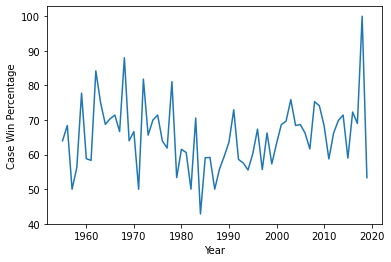

In [83]:
win_percent_dict = {}

for year in unique_years:
    win_percent_dict[year] = []

for (wins, year) in zip(data["first_party_won"].to_list(), years):
    win_percent_dict[year].append(100 * int(wins))


win_percent_dict = {k: avg(v) for k, v in win_percent_dict.items()}

plt.plot(win_percent_dict.keys(), win_percent_dict.values())
plt.xlabel("Year")
plt.ylabel("Case Win Percentage")
plt.show()